In [1]:
# loading the necessary packages
library(e1071)
library(caTools) 
library(tidyverse)
library(caret)
library(Metrics)
library(lubridate)
library(DT)

Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.0     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: lattice

Attaching package: ‘caret’

The following object is masked from ‘package:purrr’:

    lift


Attaching package: ‘Metrics’

The following objects are masked from ‘package:caret’:

    precision, recall


Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



In [2]:
# loading the dataset
uber <- read.csv("Uber-Jan-Feb-FOIL.csv", header= T) 
head(uber)

dispatching_base_number,date,active_vehicles,trips
B02512,1/1/2015,190,1132
B02765,1/1/2015,225,1765
B02764,1/1/2015,3427,29421
B02682,1/1/2015,945,7679
B02617,1/1/2015,1228,9537
B02598,1/1/2015,870,6903


In [3]:
dim(uber)

[1] 354   4

In [4]:
# checking null values of the dataset
sum(is.null(uber))

[1] 0

In [5]:
# Changing format of Date.Time of uber
uber$date <- strptime(uber$date, format = "%m/%d/%Y") 

# New columns are generated/extracted
uber$Day <- as.integer(format(uber$date, "%d"))

uber$month <- factor(month(uber$date, label = TRUE)) 

head(uber)

dispatching_base_number,date,active_vehicles,trips,Day,month
B02512,2015-01-01,190,1132,1,Jan
B02765,2015-01-01,225,1765,1,Jan
B02764,2015-01-01,3427,29421,1,Jan
B02682,2015-01-01,945,7679,1,Jan
B02617,2015-01-01,1228,9537,1,Jan
B02598,2015-01-01,870,6903,1,Jan


In [6]:
uber %>% 
    group_by(month) %>%
    summarize(total_trip = sum(trips),
              total_active_vehicles = sum(active_vehicles))

month,total_trip,total_active_vehicles
Jan,1908649,226335
Feb,2221581,236497


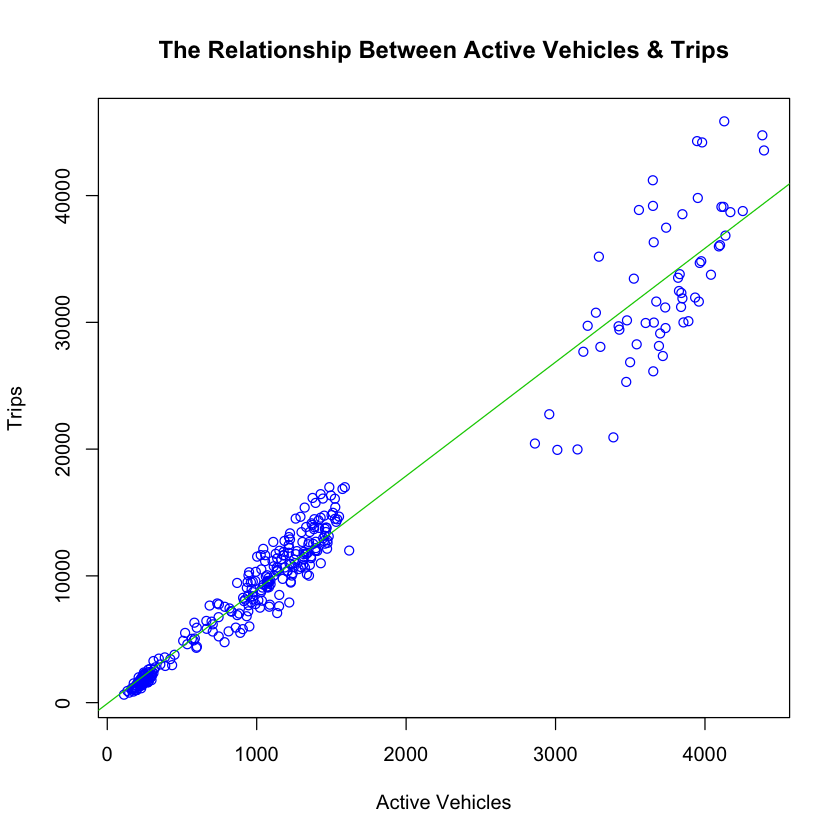

In [7]:
# Plotting the variables
x=uber$active_vehicles
y=uber$trips

plot(x,y, col="blue",  main="The Relationship Between Active Vehicles & Trips", xlab="Active Vehicles", ylab="Trips")
abline(lm(y~x), col=3)

Warning message in abline(lm(y ~ x), col = 3):
“only using the first two of 6 regression coefficients”

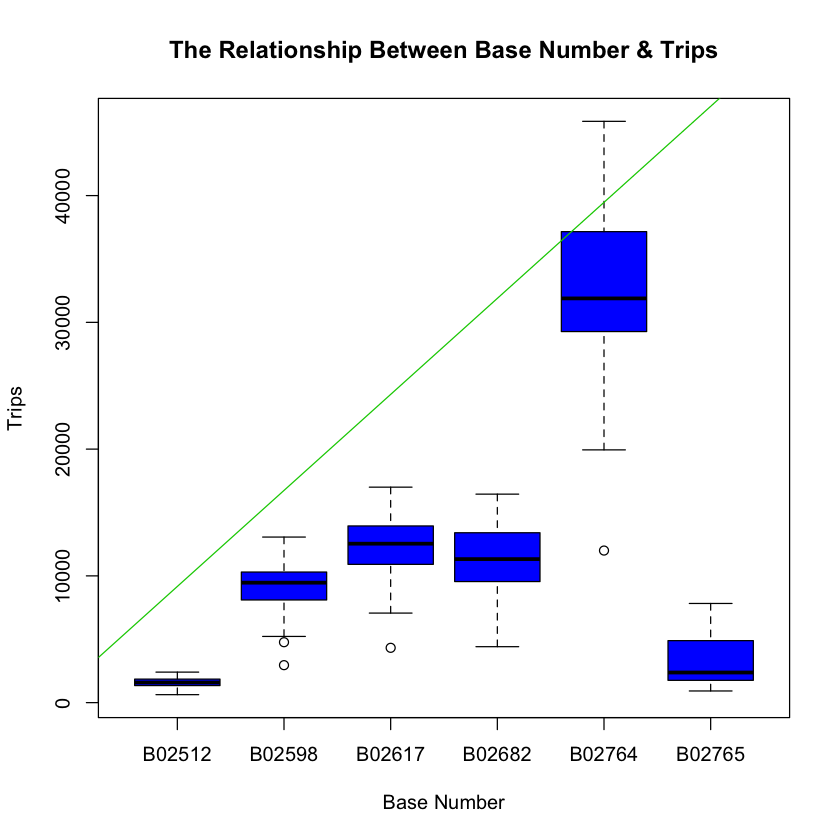

In [8]:
# See if base number have anything to do with # of trips
x = uber$dispatching_base_number
y = uber$trips
plot(x,y, col="blue",  main="The Relationship Between Base Number & Trips", xlab="Base Number", ylab="Trips")
abline(lm(y~x), col=3)

In [9]:
#splitting the data into testing and training data
train_size <- nrow(uber) * 0.75
inTrain <- sample(1:nrow(uber), size = train_size)

train <- uber[inTrain,]
test <- uber[-inTrain,]

dim(train)
dim(test)

[1] 265   6

[1] 89  6


Call:
lm(formula = trips ~ active_vehicles, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-7765.3  -620.7  -226.2   630.2  9118.0 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      54.9089   176.7942   0.311    0.756    
active_vehicles   8.7971     0.1025  85.792   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1917 on 263 degrees of freedom
Multiple R-squared:  0.9655,	Adjusted R-squared:  0.9654 
F-statistic:  7360 on 1 and 263 DF,  p-value: < 2.2e-16


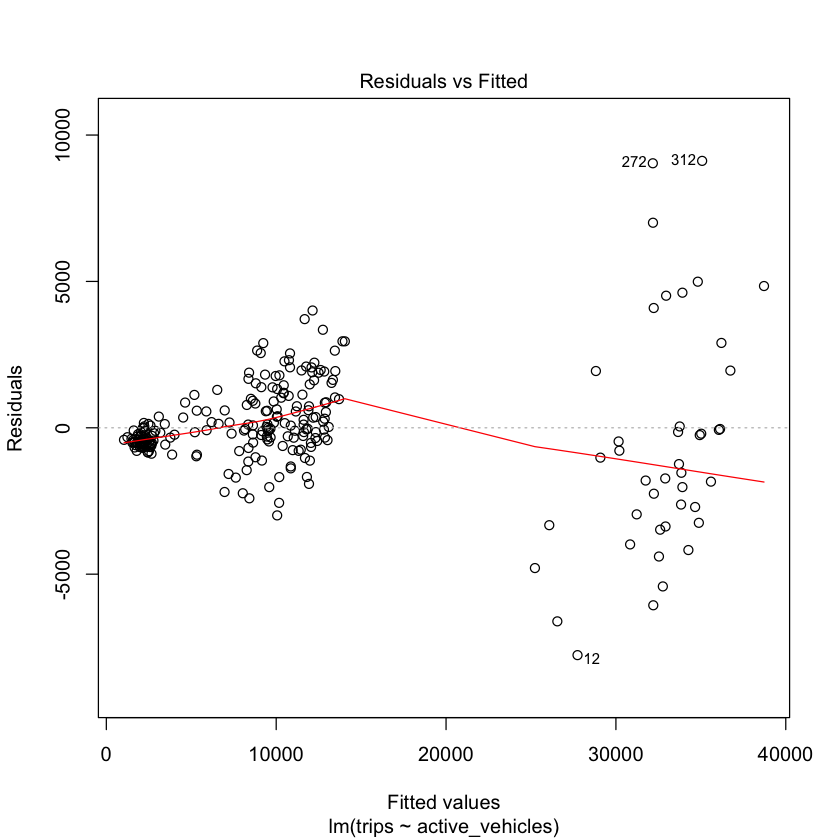

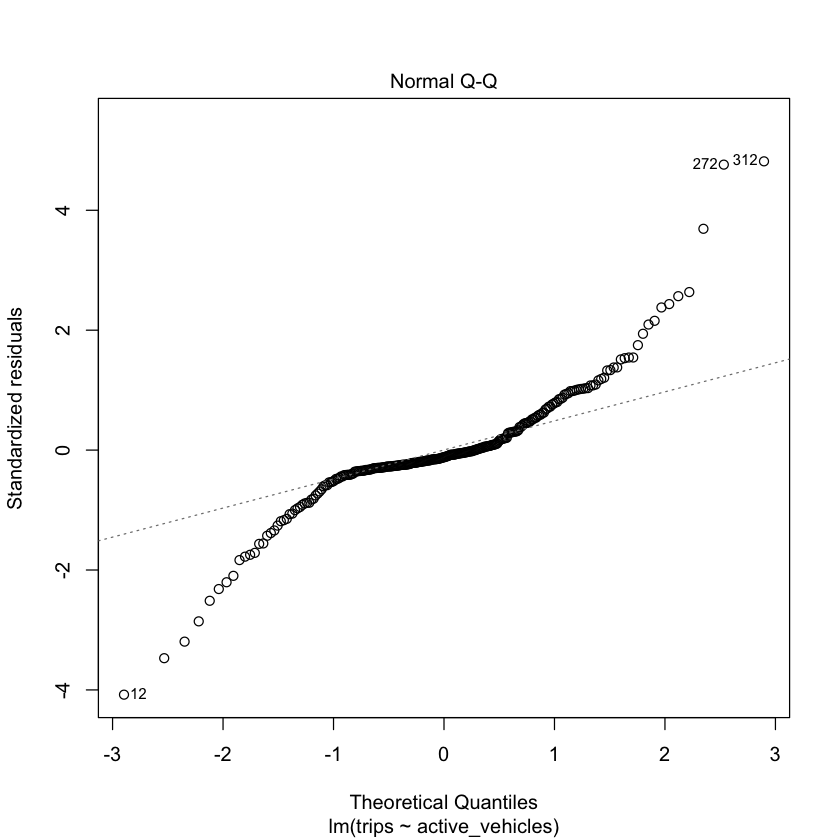

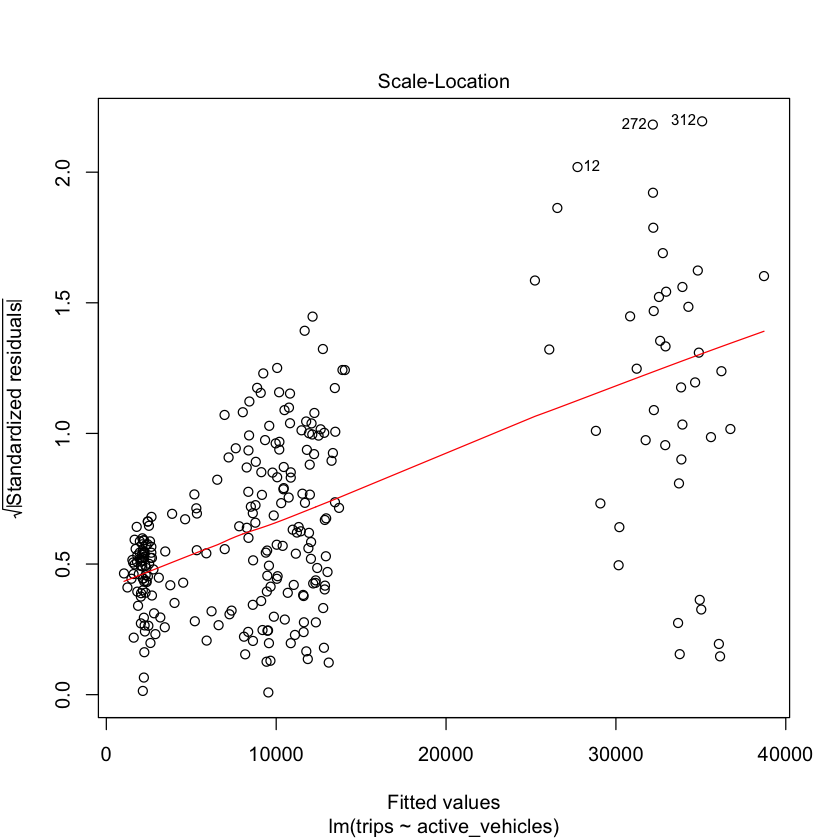

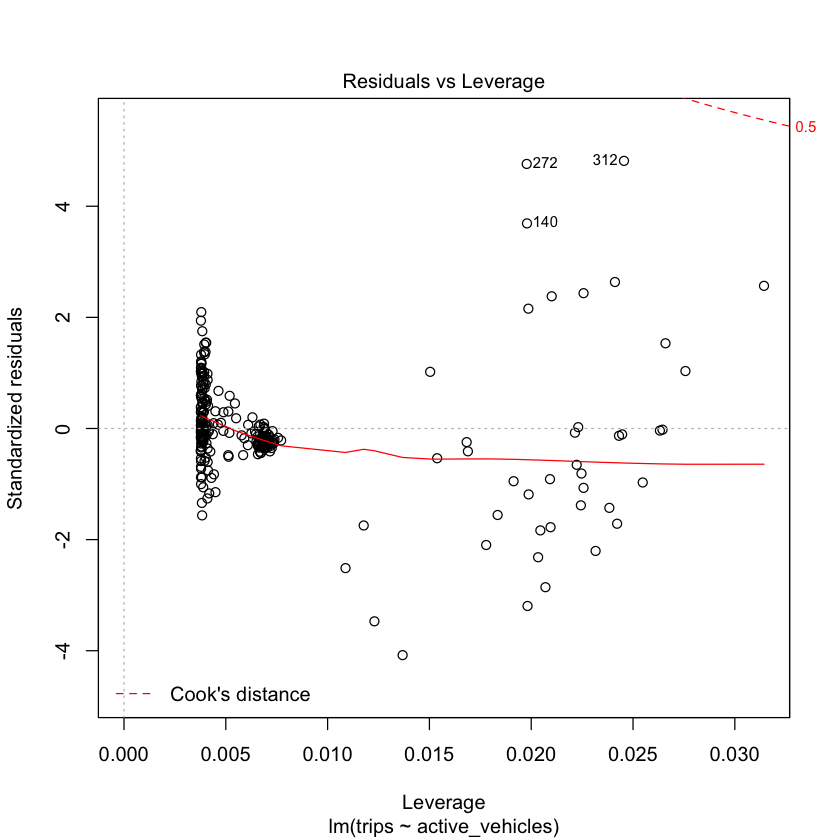

In [10]:
# training linear model
lm.fit<- lm(trips~active_vehicles,data = train)
lm.fit_sum = summary(lm.fit)
lm.fit_sum
plot(lm.fit)

[1] 0.9558773

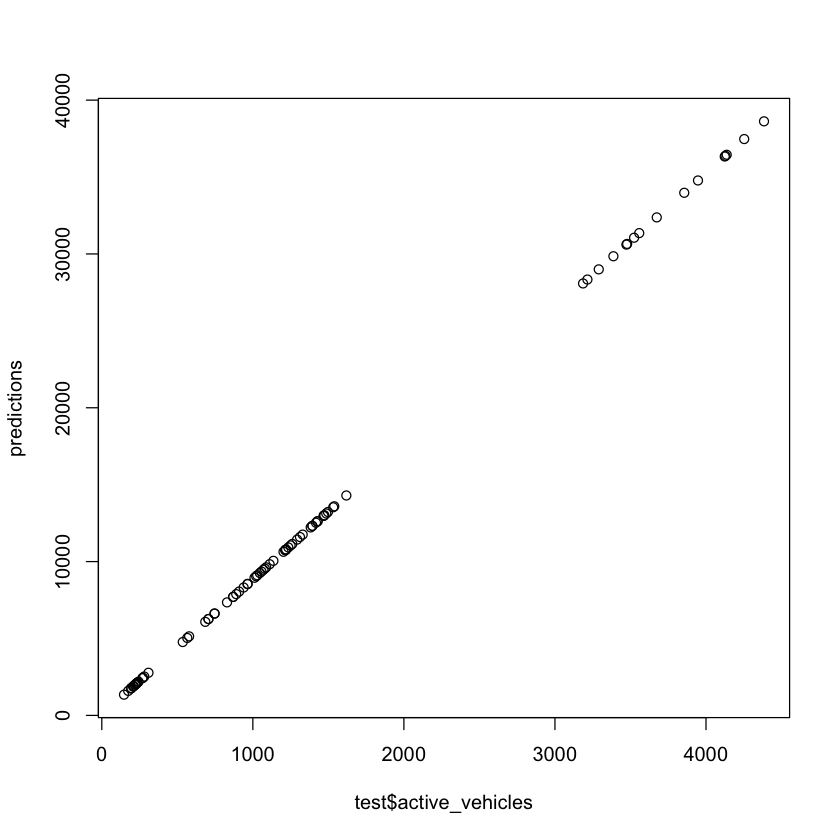

In [11]:
predictions <- lm.fit %>% predict(test)
plot(test$active_vehicles,predictions)

# R-square
R2(test$trips,predictions)